In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [60]:
df =pd.read_csv('F:/Python_Intelli/Deep  learning/customer_churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [62]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### A. Data Manipulation:

In [65]:
#a. Find the total number of male customers 
# Count total male customers
total_male_customers = df[df['gender'] == 'Male'].shape[0]

print(f"Total Male Customers: {total_male_customers}")

Total Male Customers: 3555


In [67]:
#b. Find the total number of customers whose Internet Service is ‘DSL
total_number_of_customers= sum(df['InternetService']=="DSL")

print(f"Total number of Customers: {total_number_of_customers}")

Total number of Customers: 2421


In [69]:
# c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’
new_customer=df[(df['gender']=='Female') & (df['SeniorCitizen']==1) & (df['PaymentMethod']=='Mailed check')] 
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


In [71]:
# d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’
# Convert 'tenure' and 'TotalCharges' to numeric 
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

new_customer1=df[(df['tenure']<10) | (df['TotalCharges']<500)]
new_customer1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


### B. Data Visualization:

Churn
No     5174
Yes    1869
Name: count, dtype: int64


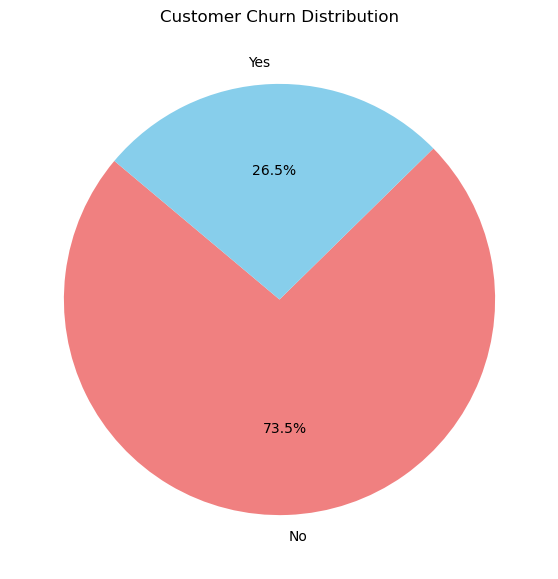

In [74]:
# a. Build a pie-chart to show the distribution of customers would be churning out
import matplotlib.pyplot as plt

print(df['Churn'].value_counts())
churn_counts = df['Churn'].value_counts()

# Plot the Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], startangle=140)
plt.title("Customer Churn Distribution")
plt.show()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


C:\Users\DeLL\AppData\Local\Temp\ipykernel_4524\1972073457.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=internet_service_counts.index, y=internet_service_counts.values, palette="viridis")


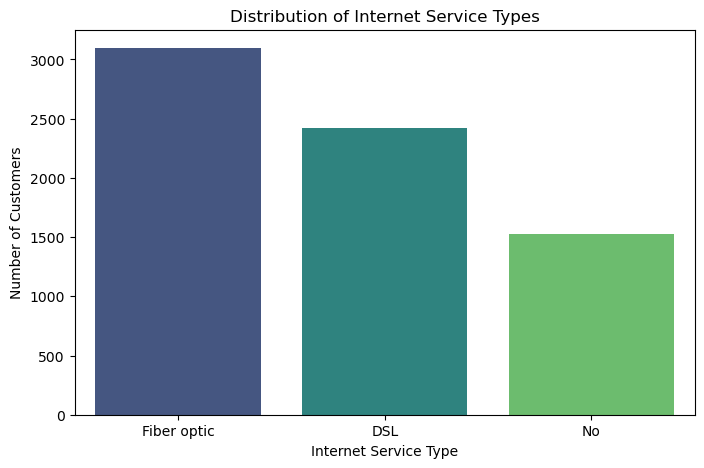

In [75]:
# b. Build a bar-plot to show the distribution of ‘Internet Service’ 

print(df['InternetService'].value_counts())

internet_service_counts = df['InternetService'].value_counts()

# Plotting the Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=internet_service_counts.index, y=internet_service_counts.values, palette="viridis")

# Add labels and title
plt.xlabel("Internet Service Type")
plt.ylabel("Number of Customers")
plt.title("Distribution of Internet Service Types")
plt.xticks(rotation=0)  # Ensure labels are readable
plt.show()

### C. Model Building: 

a.Build a sequential model using Keras, to find out if the customerwouldchurn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:


In [80]:
#import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Convert 'Churn' column to binary (Yes = 1, No = 0)
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

# Selecting feature ('tenure') and target ('Churn')
X = df[['tenure']].values  # Feature (independent variable)
y = df['Churn'].values     # Target (dependent variable)

# Standardizing 'tenure' to improve model performance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting dataset into Training and Testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Sequential Model
model = Sequential([
    Dense(12, activation='relu', input_shape=(1,)),  # Input layer with 16 neurons
    Dense(8, activation='relu'),                     # Hidden layer with 8 neurons
    Dense(1, activation='sigmoid')                   # Output layer (sigmoid for binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")



F:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
564/564 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7247 - loss: 0.5794 - val_accuracy: 0.7353 - val_loss: 0.5108
Epoch 2/150
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7408 - loss: 0.5130 - val_accuracy: 0.7353 - val_loss: 0.5019
Epoch 3/150
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7396 - loss: 0.5102 - val_accuracy: 0.7353 - val_loss: 0.4998
Epoch 4/150
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7291 - loss: 0.5201 - val_accuracy: 0.7353 - val_loss: 0.4980
Epoch 5/150
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7359 - loss: 0.5087 - val_accuracy: 0.7353 - val_loss: 0.4990
Epoch 6/150
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7477 - loss: 0.5085 - val_accuracy: 0.7353 - val_loss: 0.4984
Epoch 7/150
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7450 - loss: 0.5031 - val_accuracy: 0.7353 - val_loss: 0.4992
Epoch 8/150
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7461 - loss: 0.5043 - val_accu

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix:
 [[929 107]
 [239 134]]
Test Accuracy: 75.44%


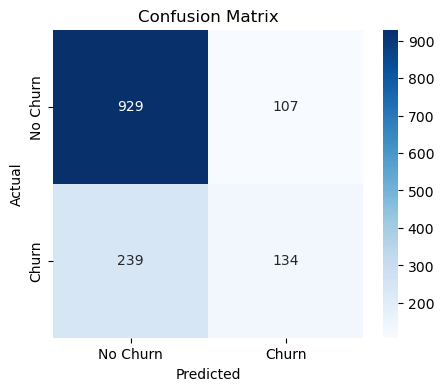

In [81]:
# Predict the values on the test set and build a confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score

# Make Predictions on Test Set
y_pred_prob = model.predict(X_test)  # Get probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary (threshold = 0.5)

# Build Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print Confusion Matrix and Accuracy
print("Confusion Matrix:\n", cm)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Visualizing the Confusion Matrix using Seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



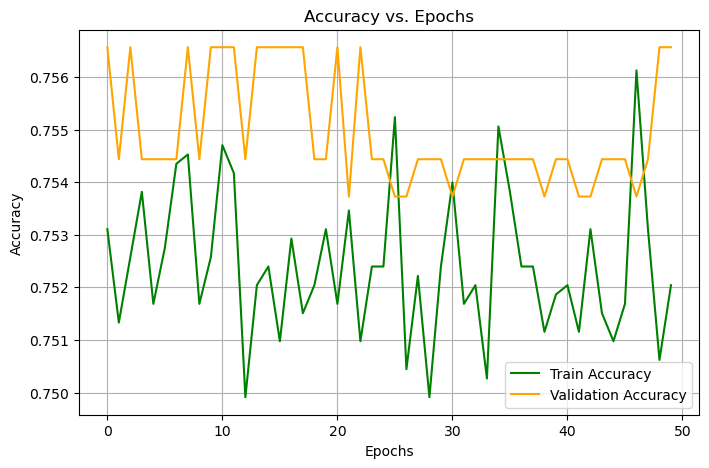

In [90]:
# Plot the ‘Accuracy vs Epochs’ graph
# Plot Accuracy vs Epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()

#b. Build the 2nd model using same target and feature variables:

Epoch 1/50


F:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6743 - loss: 0.5846 - val_accuracy: 0.7913 - val_loss: 0.4426
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7701 - loss: 0.4775 - val_accuracy: 0.7935 - val_loss: 0.4352
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7703 - loss: 0.4785 - val_accuracy: 0.7942 - val_loss: 0.4305
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7825 - loss: 0.4653 - val_accuracy: 0.7999 - val_loss: 0.4309
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7861 - loss: 0.4654 - val_accuracy: 0.7991 - val_loss: 0.4284
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7878 - loss: 0.4581 - val_accuracy: 0.7991 - val_loss: 0.4288
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7835 - loss: 0.4605 - val_accuracy: 0.8020 - val_loss: 0.4281
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7927 - loss: 0.4626 - val_accuracy: 0.7984 - val_

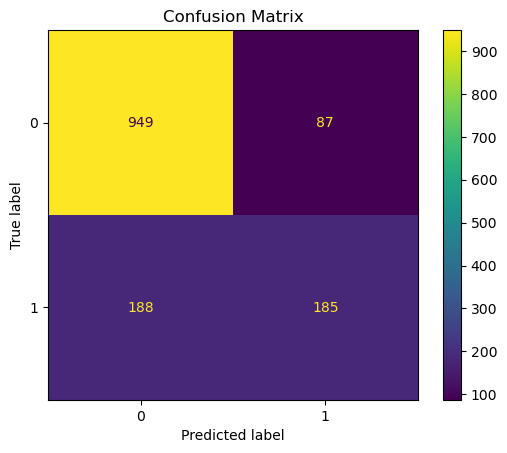

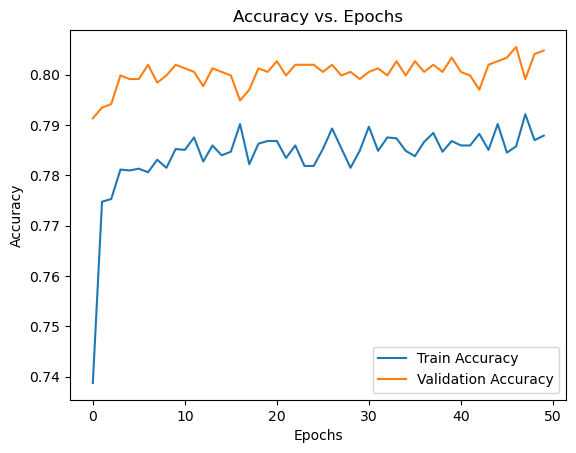

In [116]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Define the model with dropout layers
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Dropout after input layer
    Dense(32, activation='relu'),
    Dropout(0.2),  # Dropout after hidden layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32, verbose=1)


# Predict test set labels
y_pred = (model.predict(X_test) > 0.5).astype("int32")
# Ensure predictions are in the correct shape
y_pred = y_pred.ravel()  # Converts shape (N,1) to (N,)
y_test = y_test.ravel()

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Plot Accuracy vs. Epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')
plt.show()


#c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column

C:\Users\DeLL\AppData\Local\Temp\ipykernel_4524\2272243998.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
F:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6839 - loss: 0.5949 - val_accuracy: 0.7644 - val_loss: 0.4571
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7532 - loss: 0.4967 - val_accuracy: 0.7999 - val_loss: 0.4383
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7628 - loss: 0.4812 - val_accuracy: 0.8034 - val_loss: 0.4359
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7820 - loss: 0.4691 - val_accuracy: 0.8013 - val_loss: 0.4338
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7620 - loss: 0.4841 - val_accuracy: 0.8020 - val_loss: 0.4310
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7728 - loss: 0.4803 - val_accuracy: 0.8006 - val_loss: 0.4304
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7765 - loss: 0.4696 - val_accuracy: 0.8006 - val_loss: 0.4293
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7879 - loss: 0.4666 - val_accuracy: 0

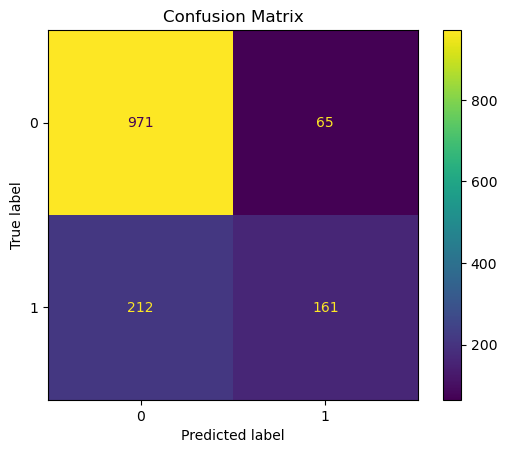

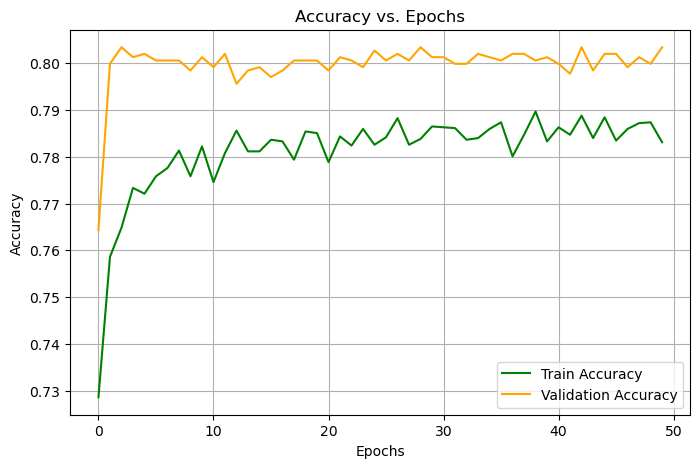

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the dataset (Replace with actual dataset file)
df =pd.read_csv('F:/Python_Intelli/Deep  learning/customer_churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert 'Churn' to numerical (if it's categorical)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

#Fix 'Total Charges' column:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert to numeric, set errors to NaN

# Fill missing 'Total Charges' with median (or use 0)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Selecting the features and target
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']].values
y = df['Churn'].values

# Handle missing or invalid values in 'Total Charges'
X = np.nan_to_num(X)  
# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the 3rd Neural Network Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32, verbose=1)

# Predict test set labels
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32").ravel()

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Plot Accuracy vs. Epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()